In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | sambava
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | piacabucu
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | pandan
Processing Record 9 of Set 1 | axim
Processing Record 10 of Set 1 | gamba
Processing Record 11 of Set 1 | namibe
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | ballina
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | teguldet
Processing Record 21 of Set 1 | the valley
Processing Record 22 of Set 1 | bacolod
Processing Record 23 of Set 1 | butaritari
Proc

Processing Record 40 of Set 4 | shasta lake
Processing Record 41 of Set 4 | shitanjing
Processing Record 42 of Set 4 | dinar
Processing Record 43 of Set 4 | natal
Processing Record 44 of Set 4 | karratha
Processing Record 45 of Set 4 | olafsvik
Processing Record 46 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 4 | pevek
Processing Record 48 of Set 4 | dwarka
Processing Record 49 of Set 4 | chebsara
Processing Record 50 of Set 4 | simbahan
Processing Record 1 of Set 5 | vanimo
Processing Record 2 of Set 5 | gat
Processing Record 3 of Set 5 | shiraz
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | baragua
Processing Record 6 of Set 5 | puerto ayacucho
Processing Record 7 of Set 5 | sola
Processing Record 8 of Set 5 | pantao
Processing Record 9 of Set 5 | labrea
Processing Record 10 of Set 5 | marcona
City not found. Skipping...
Processing Record 11 of Set 5 | toftir
City not found. Skipping...
Processing Record 12 of Set 5 | kunu

Processing Record 30 of Set 8 | hammerfest
Processing Record 31 of Set 8 | maraba
Processing Record 32 of Set 8 | sipe sipe
Processing Record 33 of Set 8 | naliya
Processing Record 34 of Set 8 | te anau
Processing Record 35 of Set 8 | tuatapere
Processing Record 36 of Set 8 | dingle
Processing Record 37 of Set 8 | aksu
Processing Record 38 of Set 8 | lavrentiya
Processing Record 39 of Set 8 | villamontes
Processing Record 40 of Set 8 | terre-de-bas
Processing Record 41 of Set 8 | pombas
Processing Record 42 of Set 8 | seoul
Processing Record 43 of Set 8 | chokurdakh
Processing Record 44 of Set 8 | kruisfontein
Processing Record 45 of Set 8 | kafanchan
Processing Record 46 of Set 8 | sao paulo de olivenca
Processing Record 47 of Set 8 | vao
Processing Record 48 of Set 8 | fare
Processing Record 49 of Set 8 | porto walter
Processing Record 50 of Set 8 | yar-sale
Processing Record 1 of Set 9 | pisco
Processing Record 2 of Set 9 | mabaruma
Processing Record 3 of Set 9 | bat khela
Processin

Processing Record 23 of Set 12 | la ferte-bernard
Processing Record 24 of Set 12 | bela
Processing Record 25 of Set 12 | diego de almagro
Processing Record 26 of Set 12 | palmer
Processing Record 27 of Set 12 | lubango
Processing Record 28 of Set 12 | pangkalanbuun
Processing Record 29 of Set 12 | chernyshevskiy
Processing Record 30 of Set 12 | benghazi
Processing Record 31 of Set 12 | genhe
Processing Record 32 of Set 12 | lasa
Processing Record 33 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 34 of Set 12 | kungurtug
Processing Record 35 of Set 12 | francistown
Processing Record 36 of Set 12 | grand-santi
Processing Record 37 of Set 12 | atar
Processing Record 38 of Set 12 | erzin
Processing Record 39 of Set 12 | ahipara
Processing Record 40 of Set 12 | stornoway
Processing Record 41 of Set 12 | sueyoshi
Processing Record 42 of Set 12 | kapoeta
Processing Record 43 of Set 12 | jacksonville
Processing Record 44 of Set 12 | barbar
City not found. Skipping...
Proce

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,55.00,81,40,6.93,ZA,2020-08-28 01:27:14
1,Sambava,-14.27,50.17,69.01,82,90,8.99,MG,2020-08-28 01:27:14
2,Ushuaia,-54.80,-68.30,35.60,64,40,8.05,AR,2020-08-28 01:27:14
3,Piacabucu,-10.41,-36.43,71.71,75,59,6.64,BR,2020-08-28 01:27:14
4,Hermanus,-34.42,19.23,48.00,93,0,15.17,ZA,2020-08-28 01:27:14
5,Jamestown,42.10,-79.24,68.00,100,40,6.93,US,2020-08-28 01:27:14
6,Carnarvon,-24.87,113.63,71.60,100,0,10.29,AU,2020-08-28 01:27:14
7,Pandan,14.05,124.17,85.12,68,100,7.09,PH,2020-08-28 01:27:14
8,Axim,4.87,-2.24,75.83,87,100,11.50,GH,2020-08-28 01:27:14
9,Gamba,-2.65,10.00,74.48,88,100,7.67,GA,2020-08-28 01:27:14


In [7]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2020-08-28 01:27:14,-33.93,18.42,55.00,81,40,6.93
1,Sambava,MG,2020-08-28 01:27:14,-14.27,50.17,69.01,82,90,8.99
2,Ushuaia,AR,2020-08-28 01:27:14,-54.80,-68.30,35.60,64,40,8.05
3,Piacabucu,BR,2020-08-28 01:27:14,-10.41,-36.43,71.71,75,59,6.64
4,Hermanus,ZA,2020-08-28 01:27:14,-34.42,19.23,48.00,93,0,15.17
...,...,...,...,...,...,...,...,...,...
573,Willowmore,ZA,2020-08-28 01:27:50,-33.29,23.49,45.34,78,2,8.32
574,Aykhal,RU,2020-08-28 01:27:50,66.00,111.50,53.60,40,40,4.47
575,Lac Du Bonnet,CA,2020-08-28 01:22:51,50.25,-96.06,72.00,99,100,1.01
576,Bodden Town,KY,2020-08-28 01:23:05,19.28,-81.25,84.20,89,20,5.82


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time

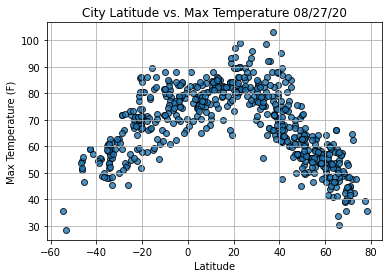

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

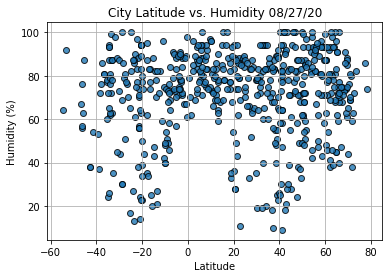

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

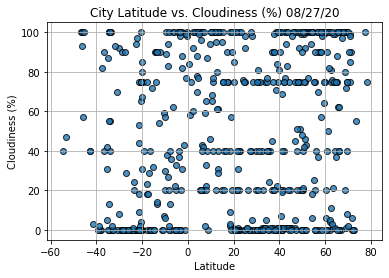

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

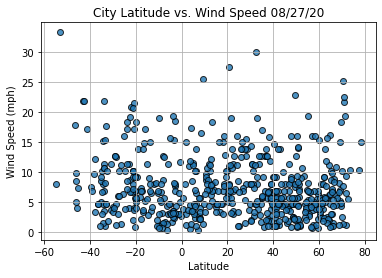

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()